In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python", "scikit-image", "scikit-learn",]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python
Installing: scikit-image
Installing: scikit-learn


## Загрузка данных CIFAR-10  
x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# Задание 1 Old school image classifier



In [ ]:
from skimage.feature import hog
def preproc(data):
  hogs = []

  for i in data:
    fd = hog( # Histogram of Oriented Gradients
        i,
        orientations=8,
        pixels_per_cell=(16, 16),
        cells_per_block=(1, 1),
        visualize=False,
        channel_axis=-1,
    )
    fd = fd.tolist()
    fd+=list(np.histogram(i[:, :, 2].ravel(), bins=np.arange(256))[0]) # Гистограмма яркостей красного канала
    fd+=list(np.histogram(i[:, :, 1].ravel(), bins=np.arange(256))[0]) # Гистограмма яркостей зеленого канала
    fd+=list(np.histogram(i[:, :, 0].ravel(), bins=np.arange(256))[0]) # Гистограмма яркостей синего канала
    hogs.append(fd)
  return hogs

In [ ]:
pics = preproc(x_train)
pics_test = preproc(x_test)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

clf = LogisticRegression(random_state=2, max_iter=1000).fit(pics, y_train[:10000])

y_pred_LR = clf.predict(pics_test)
print(classification_report(y_test[:10000], y_pred_LR))
print()
print()
print()
print(accuracy_score(y_test[:10000], y_pred_LR))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35      1000
           1       0.30      0.29      0.30      1000
           2       0.17      0.17      0.17      1000
           3       0.20      0.20      0.20      1000
           4       0.25      0.27      0.26      1000
           5       0.22      0.19      0.20      1000
           6       0.27      0.31      0.29      1000
           7       0.22      0.20      0.21      1000
           8       0.33      0.36      0.34      1000
           9       0.26      0.25      0.26      1000

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.26     10000
weighted avg       0.26      0.26      0.26     10000




0.2599


predicted: 6
true: 6


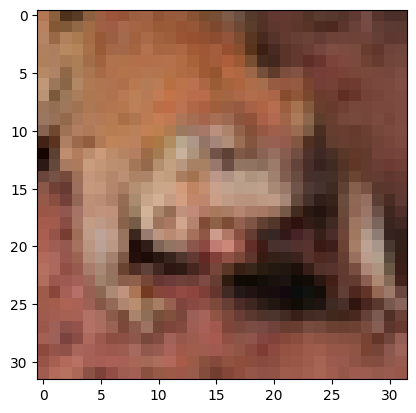

In [ ]:
print('predicted:', *clf.predict(preproc([x_test[5]])))
print('true:', *y_test[5])
plt.imshow(x_test[5])
plt.show()

##SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
vecmach = svm.SVC(kernel='rbf', probability=True)
vecmach.fit(pics[:1000] , y_train[:1000])
vecmach_pred = vecmach.predict(pics_test[:1000])


print("\nSVM - classification report:\n", classification_report(y_test[:1000], vecmach_pred))

print("Accuracy :", accuracy_score(y_test[:1000], vecmach_pred))

y_pred_prob_LR = vecmach.predict_proba(pics_test[:1000])

macro_roc_auc_ovr_LR = roc_auc_score(
    y_test[:1000],
    y_pred_prob_LR,
    multi_class="ovr",
    average="micro")
print("\nConfusion: \n", confusion_matrix(y_test[:1000], vecmach_pred))


print(f"\nMacro-averaged One-vs-Rest ROC AUC score: {macro_roc_auc_ovr_LR:.2f}")


SVM - classification report:
               precision    recall  f1-score   support

           0       0.41      0.36      0.38       103
           1       0.40      0.44      0.42        89
           2       0.27      0.28      0.27       100
           3       0.25      0.14      0.17       103
           4       0.19      0.19      0.19        90
           5       0.30      0.19      0.23        86
           6       0.34      0.49      0.40       112
           7       0.32      0.30      0.31       102
           8       0.48      0.52      0.50       106
           9       0.42      0.51      0.46       109

    accuracy                           0.35      1000
   macro avg       0.34      0.34      0.33      1000
weighted avg       0.34      0.35      0.34      1000

Accuracy : 0.348

Confusion: 
 [[37  4  4  3  3  2  7  8 21 14]
 [ 1 39  1  4  5  1  8  3  9 18]
 [13  6 28  5 10  5 17  6  6  4]
 [ 6  8 11 14 10 11 26 10  2  5]
 [ 3  4 20  2 17  3 20 11  5  5]
 [ 4  4 12 14 

predicted: 6
true: 6


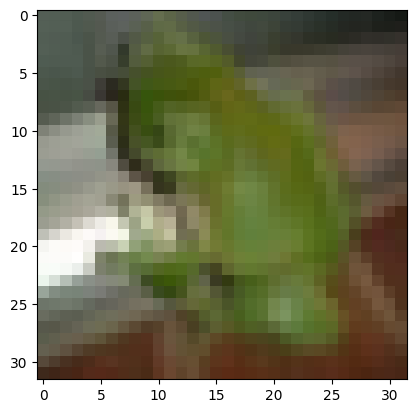

In [ ]:
print('predicted:', *vecmach.predict(preproc([x_test[7]])))
print('true:', *y_test[7])
plt.imshow(x_test[7])
plt.show()

##Decision Tree Classifier

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier().fit(pics, y_train[:10000])

y_pred_LR = clf.predict(pics_test)
print(classification_report(y_test[:10000], y_pred_LR))
print()
print()
print()
print(accuracy_score(y_test[:10000], y_pred_LR))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34      1000
           1       0.30      0.27      0.28      1000
           2       0.21      0.22      0.21      1000
           3       0.16      0.17      0.16      1000
           4       0.20      0.21      0.20      1000
           5       0.23      0.22      0.23      1000
           6       0.28      0.28      0.28      1000
           7       0.22      0.21      0.22      1000
           8       0.36      0.38      0.37      1000
           9       0.30      0.28      0.29      1000

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.26     10000
weighted avg       0.26      0.26      0.26     10000




0.2588


predicted: 4
true: 6


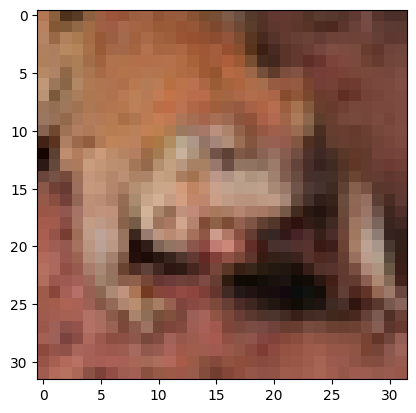

In [ ]:
print('predicted:', *clf.predict(preproc([x_test[5]])))
print('true:', *y_test[5])
plt.imshow(x_test[5])
plt.show()

# Задание 2 NN image classifier



## Используя пиксели

In [ ]:
import tensorflow as tf

In [ ]:
import keras

In [ ]:
# определяем два набора входных данных
inputA = tf.keras.Input(shape=(32, 32, 3)) # изображение
inputB = tf.keras.Input(shape=(797,)) # вектор признаков, состоящий из гистограмм каждого канала (255*3 = 765) и гистограммы ориентированных градиентов (32)]

# первая ветвь работает с изображением
x = tf.keras.layers.Rescaling(1.0 / 255)(inputA)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(3072, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
#x = tf.keras.Model(inputs=inputA, outputs=x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model_img = tf.keras.Model(inputA, outputs)


# объединяем результаты двух ветвей
#combined = tf.keras.layers.concatenate([x.output, y.output])


# применяем полносвязные слои, после чего получаем вероятности принадлежности к классам
#z = tf.keras.layers.Dense(32, activation="relu")(combined)
#z = tf.keras.layers.Dense(10, activation="softmax")(z)


#model = tf.keras.Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
model_img.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model_img.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3072)              9440256   
                                                                 
 dense_1 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 128)               65664 

In [ ]:
n_elements = 10000
epochs = 15
training_results = model_img.fit(x_train[:50000], y_train[:50000], epochs = epochs, validation_data=(x_test[:n_elements], y_test[:n_elements]))

Epoch 1/15
1563/1563 [==============================] - 14s 7ms/step - loss: 1.9639 - accuracy: 0.2727 - val_loss: 1.7929 - val_accuracy: 0.3549
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7464 - accuracy: 0.3647 - val_loss: 1.6967 - val_accuracy: 0.3832
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6617 - accuracy: 0.4014 - val_loss: 1.6056 - val_accuracy: 0.4261
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6011 - accuracy: 0.4257 - val_loss: 1.6036 - val_accuracy: 0.4195
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5547 - accuracy: 0.4403 - val_loss: 1.5281 - val_accuracy: 0.4508
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5078 - accuracy: 0.4566 - val_loss: 1.5318 - val_accuracy: 0.4514
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4731 - accuracy: 0.4709 - val_loss: 1.5264 - val_ac

In [ ]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)

    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

### График обучения

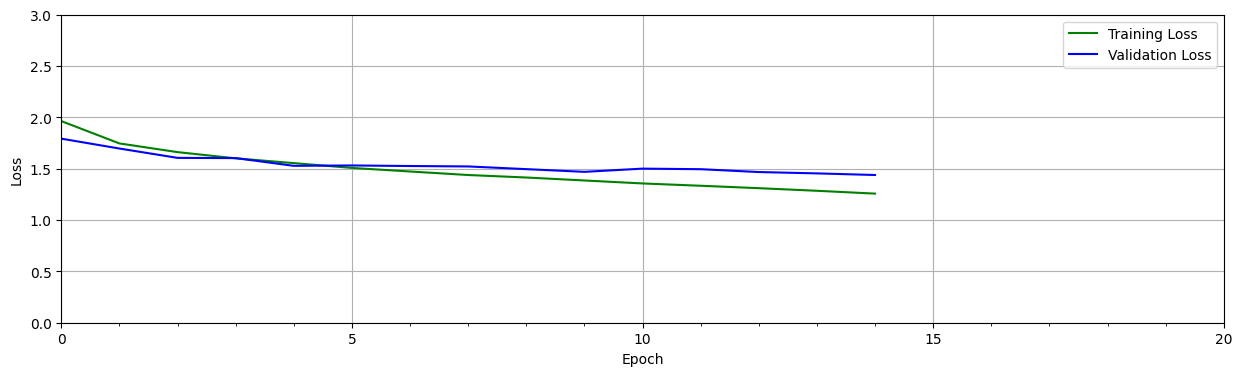

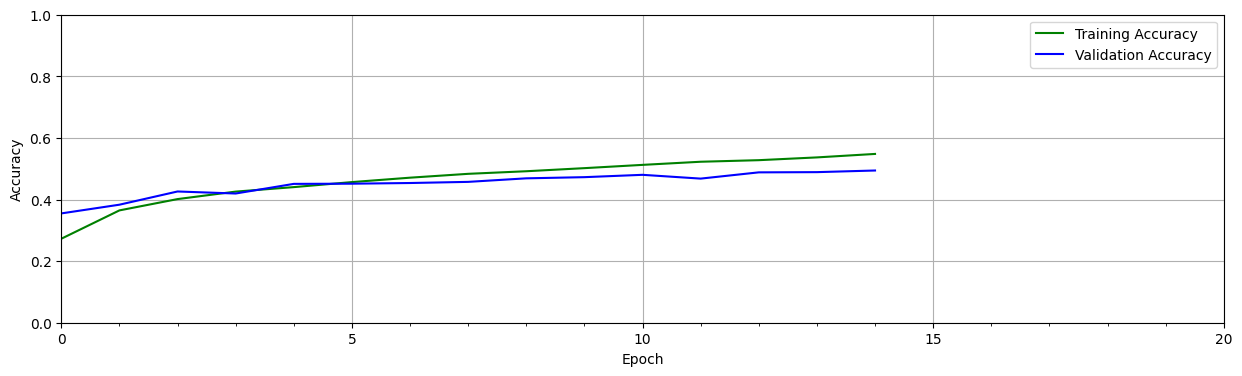

In [ ]:
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0, 3],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

### Предсказание на произвольном элементе

313/313 [==============================] - 5s 12ms/step
Ground truth for test class:  [9]


Predictions for each class:

class: 0  probability:  0.0058384505
class: 1  probability:  0.23789363
class: 2  probability:  0.06781428
class: 3  probability:  0.02401248
class: 4  probability:  0.005758155
class: 5  probability:  0.028861854
class: 6  probability:  0.004616593
class: 7  probability:  0.019753836
class: 8  probability:  0.0021954624
class: 9  probability:  0.6032553


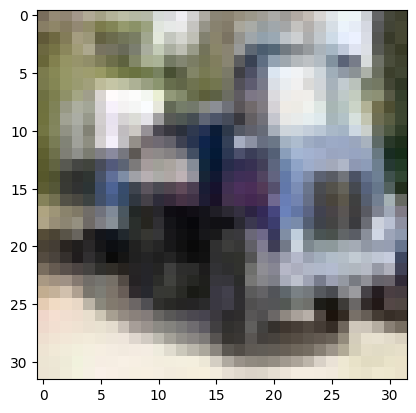

In [ ]:
predictions = model_img.predict(x_test)
index = 28
plt.imshow(x_test[index])
print('Ground truth for test class: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('class:', i, ' probability: ', predictions[index][i])

## Используя признаки

In [ ]:
inputB = tf.keras.Input(shape=(797,)) # вектор признаков, состоящий из гистограмм каждого канала (255*3 = 765) и гистограммы ориентированных градиентов (32)]
# вторая ветвь работает с вектором признаков
y = tf.keras.layers.Dense(797, activation="relu")(inputB)
y = tf.keras.layers.Dense(512, activation="relu")(y)
y = tf.keras.layers.Dense(128, activation="relu")(y)
y = tf.keras.layers.Dense(64, activation="relu")(y)
#y = tf.keras.Model(inputs=inputB, outputs=y)
outputs = tf.keras.layers.Dense(10, activation="softmax")(y)
model_feat = tf.keras.Model(inputB, outputs)
#model_feat = tf.keras.Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
model_feat.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model_feat.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 797)]             0         
                                                                 
 dense_11 (Dense)            (None, 797)               636006    
                                                                 
 dense_12 (Dense)            (None, 512)               408576    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 1119152 (4.27 MB)
Trainable params: 1119152 (

In [ ]:
training_results = model_feat.fit(np.array(pics[:50000]), y_train[:50000], epochs = epochs, validation_data=(np.array(pics[:n_elements]), y_test[:n_elements]))

Epoch 1/15
1563/1563 [==============================] - 36s 20ms/step - loss: 2.0239 - accuracy: 0.2391 - val_loss: 3.0469 - val_accuracy: 0.0980
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8826 - accuracy: 0.3022 - val_loss: 2.8589 - val_accuracy: 0.0987
Epoch 3/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.8175 - accuracy: 0.3338 - val_loss: 3.0331 - val_accuracy: 0.0971
Epoch 4/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7706 - accuracy: 0.3495 - val_loss: 3.2226 - val_accuracy: 0.0950
Epoch 5/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7294 - accuracy: 0.3669 - val_loss: 3.3091 - val_accuracy: 0.0932
Epoch 6/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.6861 - accuracy: 0.3834 - val_loss: 3.4705 - val_accuracy: 0.0964
Epoch 7/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6402 - accuracy: 0.4010 - val_loss: 3.6515 -

### График обучения

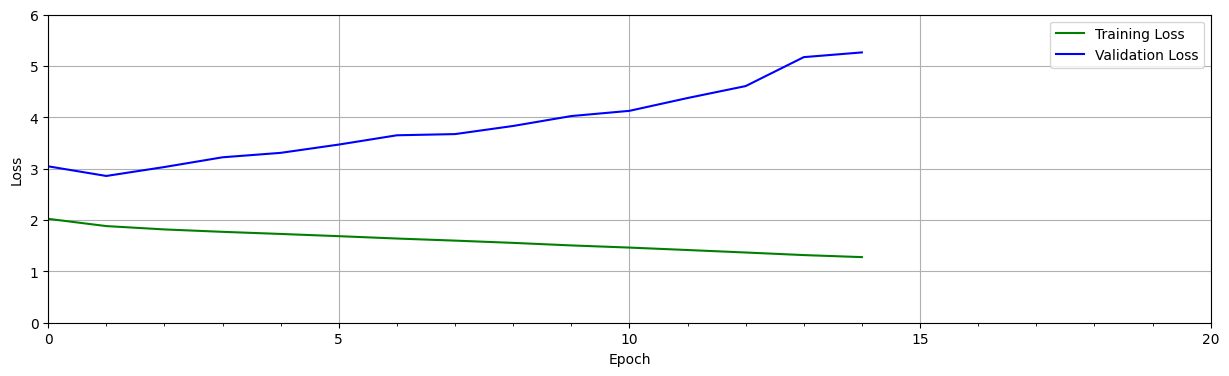

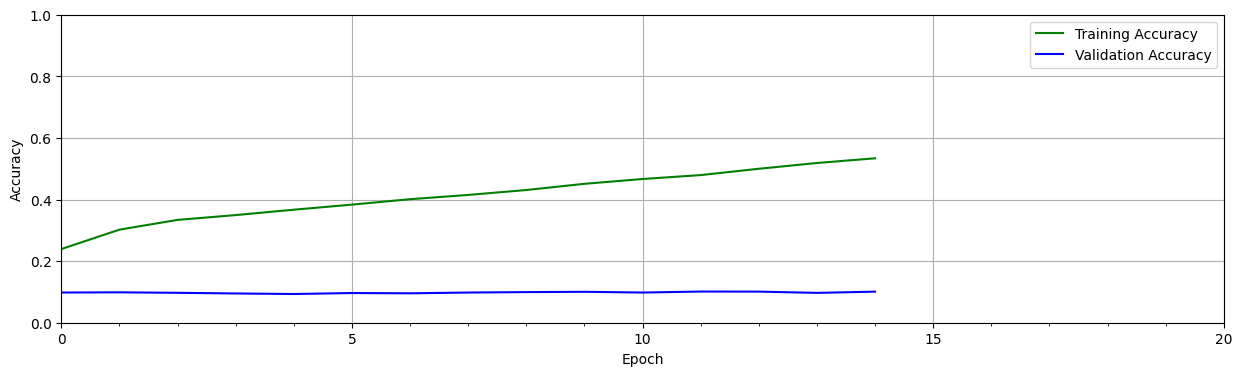

In [ ]:
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0, 6],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

### Предсказание на произвольном элементе

313/313 [==============================] - 2s 4ms/step
Ground truth for test class:  [9]


Predictions for each class:

class: 0  probability:  0.038819887
class: 1  probability:  0.23630387
class: 2  probability:  0.0261096
class: 3  probability:  0.07873212
class: 4  probability:  0.020883154
class: 5  probability:  0.06499327
class: 6  probability:  0.011998409
class: 7  probability:  0.06500351
class: 8  probability:  0.10597594
class: 9  probability:  0.3511803


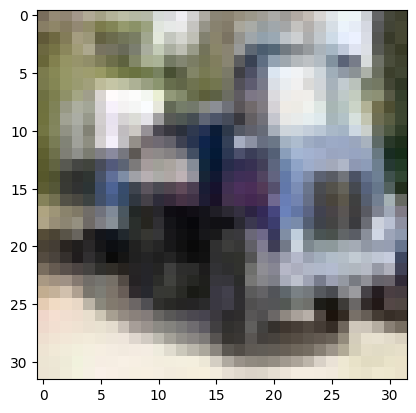

In [ ]:
predictions = model_feat.predict(pics_test)
index = 28
plt.imshow(x_test[index])
print('Ground truth for test class: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('class:', i, ' probability: ', predictions[index][i])

# Задание 3 CNN image classifier

In [ ]:
# определяем два набора входных данных
inputA = tf.keras.Input(shape=(32, 32, 3)) # изображение
inputB = tf.keras.Input(shape=(797,)) # вектор признаков, состоящий из гистограмм каждого канала (255*3 = 765) и гистограммы ориентированных градиентов (32)]


# первая ветвь работает с изображением
x = tf.keras.layers.Rescaling(1.0 / 255)(inputA)
# первый сверточный слой
x = tf.keras.layers.Conv2D(16, 3, strides=1, padding="same")(x) #output dim = 64, kernel size = 3 (weght, height of conv window)
# второй сверточный слой
x = tf.keras.layers.Conv2D(8, 4, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
#x = tf.keras.Model(inputs=inputA, outputs=x)

#x = Dense(8, activation="relu")(inputA)
#x = Dense(4, activation="relu")(x)
#x = Model(inputs=inputA, outputs=x)
#x = tf.keras.Model(inputs=inputA, outputs=x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model2 = tf.keras.Model(inputA, outputs)

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 8)         2056      
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dense_3 (Dense)             (None, 10)                650 

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
training_results2 = model2.fit(x_train[:50000], y_train[:50000], epochs=15, validation_data=(x_test[:10000], y_test[:10000]))

Epoch 1/15
1563/1563 [==============================] - 13s 5ms/step - loss: 1.6798 - accuracy: 0.4079 - val_loss: 1.5424 - val_accuracy: 0.4637
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4471 - accuracy: 0.4935 - val_loss: 1.4716 - val_accuracy: 0.4753
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3500 - accuracy: 0.5265 - val_loss: 1.4365 - val_accuracy: 0.4871
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2662 - accuracy: 0.5554 - val_loss: 1.4068 - val_accuracy: 0.5020
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1970 - accuracy: 0.5794 - val_loss: 1.4362 - val_accuracy: 0.5030
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1278 - accuracy: 0.6036 - val_loss: 1.4470 - val_accuracy: 0.4938
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0608 - accuracy: 0.6257 - val_loss: 1.5047 - val_accuracy

## График обучения

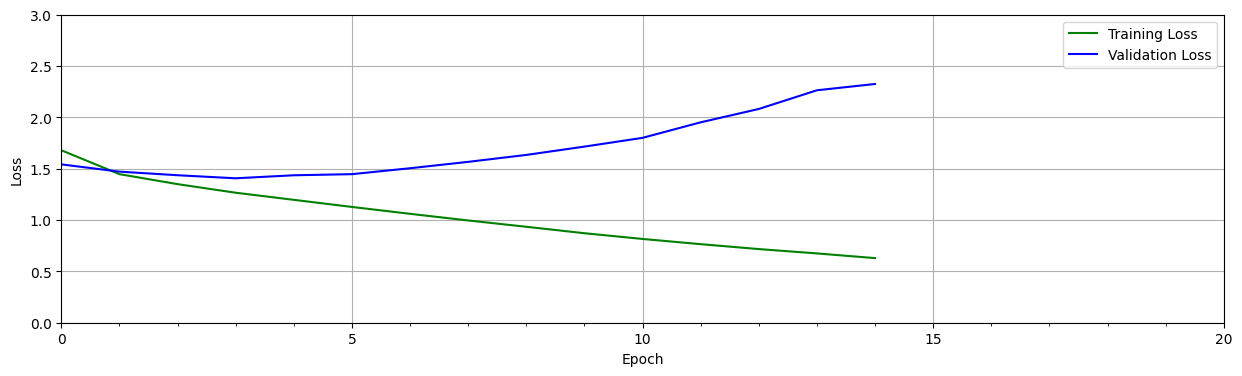

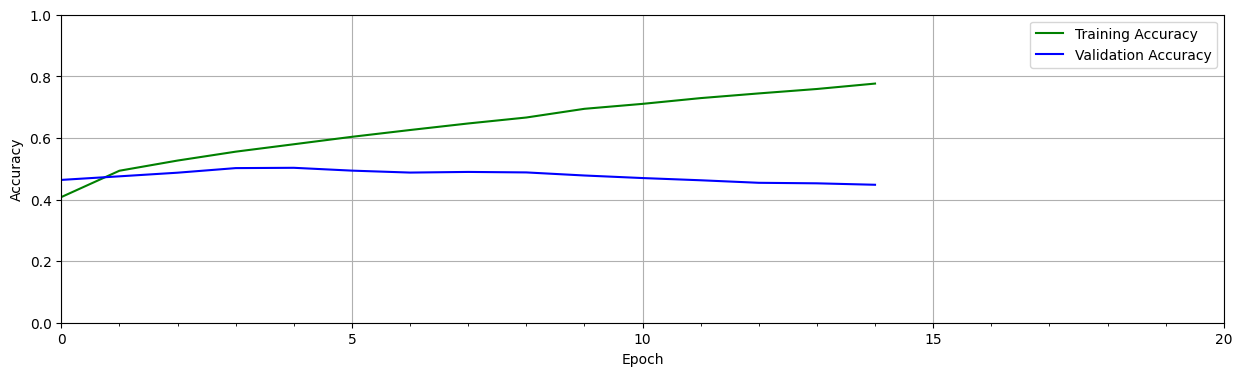

In [ ]:
train_loss = training_results2.history["loss"]
train_acc  = training_results2.history["accuracy"]
valid_loss = training_results2.history["val_loss"]
valid_acc  = training_results2.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0, 3],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

## Предсказание на произвольном элементе

313/313 [==============================] - 1s 3ms/step
Ground truth for test class:  [8]


Predictions for each class:

class: 0  probability:  0.06685932
class: 1  probability:  0.0006184817
class: 2  probability:  0.004794721
class: 3  probability:  0.00026182682
class: 4  probability:  0.02137868
class: 5  probability:  9.839278e-05
class: 6  probability:  0.0025631797
class: 7  probability:  0.0002020052
class: 8  probability:  0.90216964
class: 9  probability:  0.0010537372


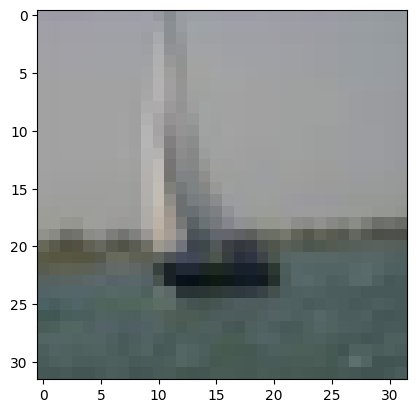

In [ ]:
predictions = model2.predict(x_test)
index = 55
plt.imshow(x_test[index])
print('Ground truth for test class: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('class:', i, ' probability: ', predictions[index][i])